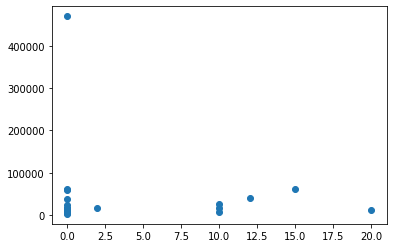

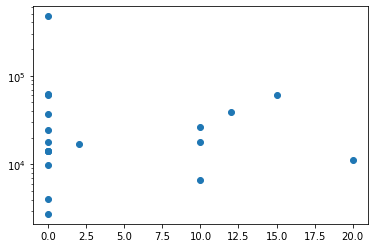

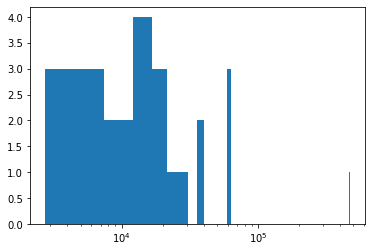

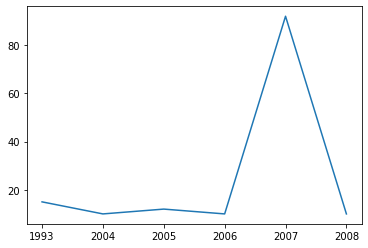

Total number of companies: 439 
Total jobs created in Queens: 102
Number of distinct email domains: 320


In [8]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

    
df = pd.read_csv("Value_of_Energy_Cost_Savings.csv")

class Milestone:
    def __init__(self, data: pd.DataFrame):
        self.companies = data

    def NumberOfCompanies(self, data: pd.DataFrame) -> int:
        name = [str(x).lower() for x in data['Company Name'].tolist()]
        self.companies = data.assign(Lowercase = name)
        self.companies.drop_duplicates(subset = "Company Name", keep = 'first', inplace = True)
        #print(type(self.companies))
        return len(self.companies.index)

    def TotalJobs(self, data: pd.DataFrame, nbhd: str) -> int:
        nbhd_data = data.loc[ data["Borough"].str.contains(nbhd, case=False) ]
        return int(nbhd_data["Job created"].sum())

    def EmailDomains(self, data: pd.DataFrame) -> int:
        domains = data["company email"]
        domains = domains.dropna()
        list_of_emails = domains.tolist()
        counter = defaultdict(int)
        for x in list_of_emails:
            if '@' in x and '.' in x:
                at = x.index('@')
                dot = x.index('.')
                dom = x[at+1:dot]
                if dom not in counter:
                    counter[dom] = 1
                else:
                    counter[dom] += 1
        return len(counter)

    def NTAs(self) -> pd.DataFrame:
        self.companies = self.companies.dropna(subset=["NTA"])
        nta = [str(x).lower() for x in self.companies["NTA"].tolist()]
        self.companies.assign(Lowercase = nta)
        counter = defaultdict(int)
        for x in self.companies["NTA"]:
            if x not in counter:
                counter[x] = 1
            else:
                counter[x] += 1
        ntas_list = {x: v for x, v in counter.items() if v > 4}
        self.companies = self.companies[(self.companies["NTA"].isin(ntas_list.keys()))]
        self.nta_answers = self.companies.groupby(["NTA"]).agg({"Total Savings" : "mean", "Job created" : "sum"})
        self.nta_answers["Total Savings"] = round(self.nta_answers["Total Savings"], 2)
        self.nta_answers["Job created"] = self.nta_answers["Job created"].astype('int')
        self.nta_answers.to_csv("Savings_and_Jobs_per_NTA.csv", header=["Total Average Savings", "Jobs Created"])
    
    def linear_plot(self):
        plt.scatter(self.nta_answers['Job created'], self.nta_answers['Total Savings'])
        plt.savefig('Linear_Plot_Average_Savings_vs_Jobs_Created.png')
        plt.show()
        
    def log_plot(self):
        plt.scatter(self.nta_answers['Job created'], self.nta_answers['Total Savings'])
        plt.savefig('Log_Plot_Average_Savings_vs_Jobs_Created.png')
        plt.yscale("log")
        plt.show()
        
    def histogram(self):
        plt.hist(self.nta_answers['Total Savings'], bins=100)
        plt.xscale("log")
        plt.savefig('Histogram_Log_Average_Savings.png')
        plt.show()
        
    def linear_per_month(self, data: pd.DataFrame):
        data['Effective Date'] = data['Effective Date'].apply(lambda x: str(x)[-4:])
        subdata = data[['Effective Date', 'Job created']]
        subdata = subdata.dropna()
        #print(subdata)
        plt.plot(subdata.groupby(['Effective Date']).sum())
        plt.savefig("Line_Plot_Jobs_per_Month.png")
        plt.show()
        
        
s = Milestone(df)
s.NumberOfCompanies(df)
s.NTAs()
s.linear_plot()
s.log_plot()
s.histogram()
s.linear_per_month(df)



print("Total number of companies:", s.NumberOfCompanies(df), "\nTotal jobs created in Queens:", s.TotalJobs(df, "Queens"))
print("Number of distinct email domains:", s.EmailDomains(df))